##Introduction to Computer Vison with Tensorflow

Computer vison is the practise of writting algorithems which can see the data from camara

##Get the data
link:https://www.kaggle.com/dansbecker/food-101

In here only using pizza and steak (Binary Classification)

In [8]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2021-07-13 06:05:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  97.8MB/s    in 1.1s    

2021-07-13 06:05:34 (97.8 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



##Inspect the Data

A vey crutial step at the begining is the become one with the data.At the computer vision this means visual many data.

In [9]:
!ls pizza_steak

test  train


In [10]:
import os

#walk though the dir and list the number
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in ''{dirpath}.")

There are 2 directories and 1 images in ''pizza_steak.
There are 2 directories and 1 images in ''pizza_steak/train.
There are 0 directories and 750 images in ''pizza_steak/train/steak.
There are 0 directories and 750 images in ''pizza_steak/train/pizza.
There are 2 directories and 1 images in ''pizza_steak/test.
There are 0 directories and 250 images in ''pizza_steak/test/steak.
There are 0 directories and 250 images in ''pizza_steak/test/pizza.


In [11]:
#extra file in the dir is ".DS Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Jul 13 06:05 .
drwxr-xr-x 1 root root 4096 Jul 13 06:05 ..
-rw-r--r-- 1 root root 6148 Jul 13 06:05 .DS_Store
drwxr-xr-x 4 root root 4096 Jul 13 06:05 test
drwxr-xr-x 4 root root 4096 Jul 13 06:05 train


In [12]:
#another way to find out how many images in the file
num_steak_images_train =len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

##Visualize the Data

In [13]:
#get the class names programatically
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))

#remove the ds store
class_names=class_names[1:]
print(class_names)

['pizza' 'steak']


In [14]:
#visulaize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  #setup the target directory 
  target_folder =target_dir+target_class

  #get the random image path
  random_image =random.sample(os.listdir(target_folder),1)

  #read the image and plot it using matplotlib
  img =mpimg.imread(target_folder + "/" +random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape : {img.shape}")

  return img
  

Image shape : (512, 512, 3)


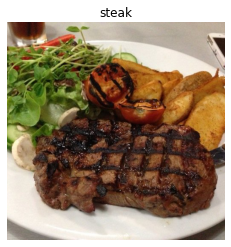

In [15]:
#view random image from training data set
img  =view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak"
)


In [16]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[194, 176, 162],
        [158, 139, 124],
        [127, 106,  89],
        ...,
        [181, 164, 146],
        [182, 165, 147],
        [185, 168, 150]],

       [[196, 179, 163],
        [164, 145, 130],
        [132, 111,  94],
        ...,
        [183, 166, 148],
        [184, 167, 149],
        [186, 169, 151]],

       [[199, 182, 166],
        [172, 155, 137],
        [141, 120, 101],
        ...,
        [187, 170, 152],
        [187, 170, 152],
        [187, 170, 152]],

       ...,

       [[208, 199, 190],
        [205, 196, 187],
        [203, 194, 185],
        ...,
        [154, 146, 133],
        [155, 147, 134],
        [156, 148, 135]],

       [[203, 194, 185],
        [201, 192, 183],
        [200, 191, 182],
        ...,
        [159, 151, 138],
        [159, 151, 138],
        [158, 151, 135]],

       [[202, 193, 184],
        [202, 193, 184],
        [201, 192, 183],
        ...,
        [160, 152, 13

In [17]:
#view the image shape 
img.shape

(512, 512, 3)

In [18]:
#get all the pixel values 0.1
img/255

array([[[0.76078431, 0.69019608, 0.63529412],
        [0.61960784, 0.54509804, 0.48627451],
        [0.49803922, 0.41568627, 0.34901961],
        ...,
        [0.70980392, 0.64313725, 0.57254902],
        [0.71372549, 0.64705882, 0.57647059],
        [0.7254902 , 0.65882353, 0.58823529]],

       [[0.76862745, 0.70196078, 0.63921569],
        [0.64313725, 0.56862745, 0.50980392],
        [0.51764706, 0.43529412, 0.36862745],
        ...,
        [0.71764706, 0.65098039, 0.58039216],
        [0.72156863, 0.65490196, 0.58431373],
        [0.72941176, 0.6627451 , 0.59215686]],

       [[0.78039216, 0.71372549, 0.65098039],
        [0.6745098 , 0.60784314, 0.5372549 ],
        [0.55294118, 0.47058824, 0.39607843],
        ...,
        [0.73333333, 0.66666667, 0.59607843],
        [0.73333333, 0.66666667, 0.59607843],
        [0.73333333, 0.66666667, 0.59607843]],

       ...,

       [[0.81568627, 0.78039216, 0.74509804],
        [0.80392157, 0.76862745, 0.73333333],
        [0.79607843, 0

##An end to end Example

build the convolutional neural network to find patterns in images ,more specifically way we need

*load our images

*preprocess our images

*build a CNN to find patternsin our image

*compile our CNN

*fit the CNN to training data

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#preprocess data(get all pixel values between 0 and 1)
train_datagen =ImageDataGenerator(rescale=1./255)
valid_datagen =ImageDataGenerator(rescale=1./255)

#setup paths to directories
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

#import data from directories anf turn into batches
train_data =train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

#build the CNN model
model_1 =tf.keras.Sequential([
                              tf.keras.layers.Conv2D(filters=10,
                                                     kernel_size=3,
                                                     activation="relu",
                                                     input_shape=(224,224,3)),
                              tf.keras.layers.Conv2D(10,3,activation="relu"),
                              tf.keras.layers.MaxPool2D(pool_size=2,
                                                        padding="valid"),
                              tf.keras.layers.Conv2D(10,3,activation="relu"),
                              tf.keras.layers.Conv2D(10,3,activation="relu"),
                              tf.keras.layers.MaxPool2D(2),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics =["accuracy"])

#fit the model
history_1 =model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 42s 222ms/step - loss: 0.5642 - accuracy: 0.7167 - val_loss: 0.4050 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4244 - accuracy: 0.8107 - val_loss: 0.3381 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 10s 211ms/step - loss: 0.3858 - accuracy: 0.8353 - val_loss: 0.3300 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 10s 214ms/step - loss: 0.3797 - accuracy: 0.8433 - val_loss: 0.3750 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 10s 209ms/step - loss: 0.3353 - accuracy: 0.8627 - val_loss: 0.3117 - val_accuracy: 0.8680


If above is taking longer make sure to change the hardware type to "GPU".

Then restart the envirnment

In [20]:
# Found 1500 images belonging to 2 classes.
# Found 500 images belonging to 2 classes.
# Epoch 1/5
# 47/47 [==============================] - ETA: 0s - loss: 0.5718 - accuracy: 0.6933

In [21]:
#model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28090)            

##Use the model as before

relicate the model pre built in classification



In [22]:
#set random seed
tf.random.set_seed(42)

#create a model to replicte playgroud model
model_2 =tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(224,224,3)),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))



Epoch 1/5
47/47 [==============================] - 10s 200ms/step - loss: 1.1166 - accuracy: 0.4940 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 197ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [23]:
#model summary
model_2.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [24]:
#set random seed
tf.random.set_seed(42)

#create a model to replicte playgroud model
model_3 =tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(224,224,3)),
                              tf.keras.layers.Dense(100,activation="relu"),
                              tf.keras.layers.Dense(100,activation="relu"),
                              tf.keras.layers.Dense(100,activation="relu"),
                              tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))





Epoch 1/5
47/47 [==============================] - 10s 202ms/step - loss: 3.0899 - accuracy: 0.5927 - val_loss: 1.3155 - val_accuracy: 0.5800
Epoch 2/5
47/47 [==============================] - 9s 197ms/step - loss: 1.1542 - accuracy: 0.6913 - val_loss: 0.9625 - val_accuracy: 0.7120
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 1.2545 - accuracy: 0.6873 - val_loss: 0.9052 - val_accuracy: 0.5900
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.6689 - accuracy: 0.7053 - val_loss: 0.5120 - val_accuracy: 0.7680
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.5251 - accuracy: 0.7693 - val_loss: 0.4402 - val_accuracy: 0.7940


In [25]:
#model 3 summary
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


##Binary Clssification

1.become one with the dataset

2.preproess the data

3.create the model

4.fit the model

5.evaluate the model

6.adjust different parameters and improve the model

7.repeat until satisfied

##Visualzie the data

Image shape : (512, 512, 3)
Image shape : (384, 512, 3)


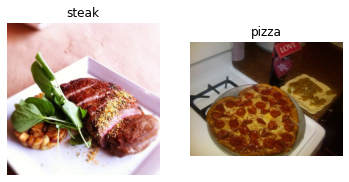

In [26]:
plt.figure()
plt.subplot(1,2,1)
steak_img =view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

##Preprocess data


In [27]:
#define the directory
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

In [28]:
#create train and test data generator and rescale data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [29]:
#loading the image data from directory
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode="binary",
                                           batch_size=32)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [30]:
#get a sample of training data batch
images,labels=train_data.next()
len(images),len(labels)


(32, 32)

In [31]:
#get the first two images
images[:2],images[0].shape


(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [32]:
#view the first batch labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

##Create the CNN Model



In [33]:
#make the creating a model easier 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

#craete the model
model_4=Sequential([
                     Conv2D(filters=10,#numbers od sliding windows
                            kernel_size=3,#the size of the slidng window
                            strides=1,#the size of the step slidng window take in image
                            padding="valid",#use "same" if output shape same as input shape ,input and output shapes are different then use "valid"
                            activation="relu",
                            input_shape=(224,224,3)),
                     Conv2D(10,3,activation="relu"),
                     Conv2D(10,3,activation="relu"),
                     Flatten(),
                     Dense(1,activation="sigmoid")

])

In [34]:
#compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [35]:
#get the summary
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_4 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [36]:
2180*218

475240

In [37]:
#fit the model
history_4 =model_4.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 221ms/step - loss: 1.3144 - accuracy: 0.6767 - val_loss: 0.4571 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 10s 211ms/step - loss: 0.4518 - accuracy: 0.7967 - val_loss: 0.3916 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 10s 212ms/step - loss: 0.3560 - accuracy: 0.8487 - val_loss: 0.3946 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 10s 213ms/step - loss: 0.1915 - accuracy: 0.9387 - val_loss: 0.4139 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 10s 213ms/step - loss: 0.0723 - accuracy: 0.9787 - val_loss: 0.5357 - val_accuracy: 0.7960


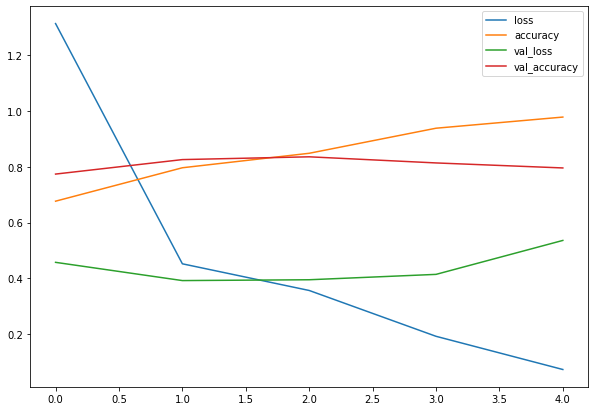

In [38]:
##Evaluate the model
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [43]:
#plot the validation and training curve
def plot_loss_curve(history):
  """
  Returns separte loss curve for trainnnig and validation mtrics
  """

  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  #plot Accuracy
  plt.figure()
  plt.plot(epochs,loss,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()


when model validation starts to increase it likly model try to overfitting to the training data set.

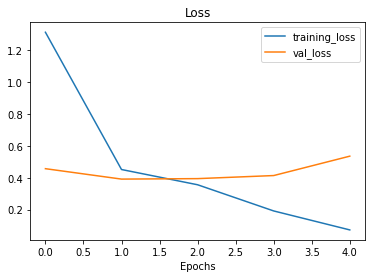

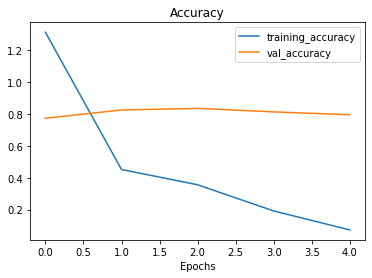

In [44]:
#check out the loss and accuracy for model
plot_loss_curve(history_4)

##Adjust model parameters

1.create a baseline 

2.beat the baseline by overfitting a larger model

3.reduce the overfitting

*ways to reduce the overfitting

1.incease the number of conv layers

2.increase the number of filters

3.add another dense layeers to the output of flattned ayer

*reduce overfitting:

1.add data augmentation

2.add regilization layers

3.add more data

In [46]:
#crate the model
model_5 =Sequential([
                     Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                     MaxPool2D(pool_size=2),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Flatten(),
                     Dense(1,activation="sigmoid")
])



In [47]:
#compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [48]:
#fit the model
history_5 =model_5.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 201ms/step - loss: 0.5737 - accuracy: 0.7307 - val_loss: 0.5415 - val_accuracy: 0.7080
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4596 - accuracy: 0.7967 - val_loss: 0.3902 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 9s 197ms/step - loss: 0.4032 - accuracy: 0.8293 - val_loss: 0.3549 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3920 - accuracy: 0.8233 - val_loss: 0.3310 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3622 - accuracy: 0.8480 - val_loss: 0.3513 - val_accuracy: 0.8420


In [49]:
#get the summary
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 6760)             

In [50]:
model_4.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_4 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


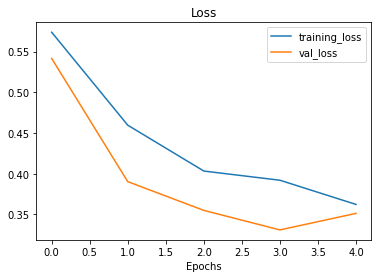

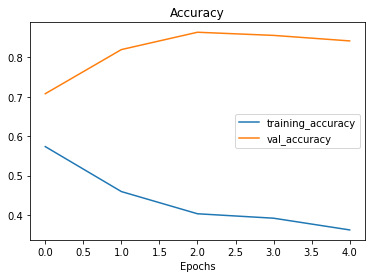

In [51]:
plot_loss_curve(history_5)

##Data Augmentation

In [52]:
#create ImageDataGenertor traninig with data augmentation
train_datagen_augmented =ImageDataGenerator(rescale=1,
                                            rotation_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.3,
                                            horizontal_flip=True)

#Create Image data gen without data generator
train_datagen =ImageDataGenerator(rescale=1/255.)

#Create Image data gen without data generator
test_datagen =ImageDataGenerator(rescale=1/255.)

